# Importing Necessary Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [92]:
# loading the data into data frame
calories = pd.read_csv("Dataset/calories.csv")
exercise = pd.read_csv("Dataset/exercise.csv")

In [93]:
# printing first five rows
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [94]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [95]:
# joining two dataframe into one
calories_data = pd.merge(exercise, calories, on="User_ID", how = 'inner')

In [96]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [97]:
calories_data.shape

(15000, 9)

In [98]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [99]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [113]:
calories_data.drop(['User_ID'], axis=1, inplace=True)
calories_data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [114]:
calories_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [115]:
# checking for null values
calories_data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# Data Visualization

In [117]:
sns.set()

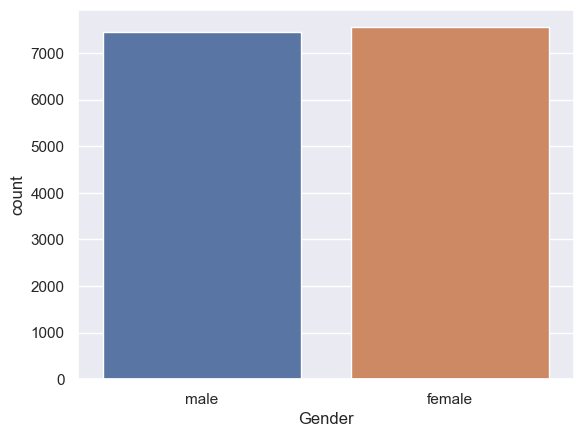

In [118]:
sns.countplot(x="Gender", data=calories_data)
plt.show()

/var/folders/6k/cg0j14ln79s7wcqt3wks21tc0000gn/T/ipykernel_19118/2061803079.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'], kde=True, bins=20)


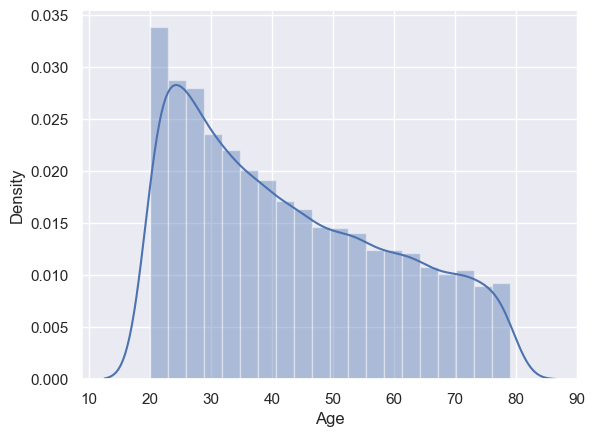

In [119]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'], kde=True, bins=20)
plt.show()

/var/folders/6k/cg0j14ln79s7wcqt3wks21tc0000gn/T/ipykernel_19118/3129748053.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'], kde=True, bins=20)


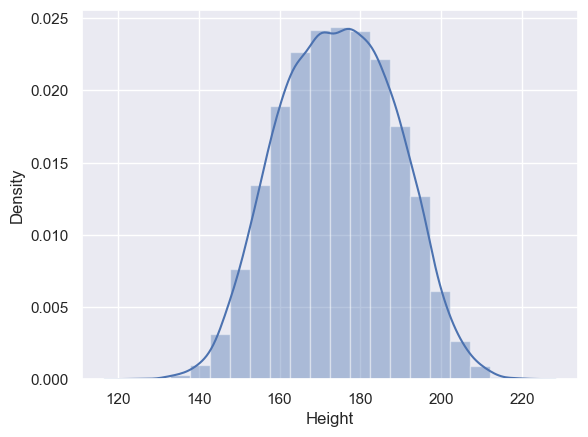

In [120]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'], kde=True, bins=20)
plt.show()

/var/folders/6k/cg0j14ln79s7wcqt3wks21tc0000gn/T/ipykernel_19118/4037942852.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'], kde=True, bins=20)


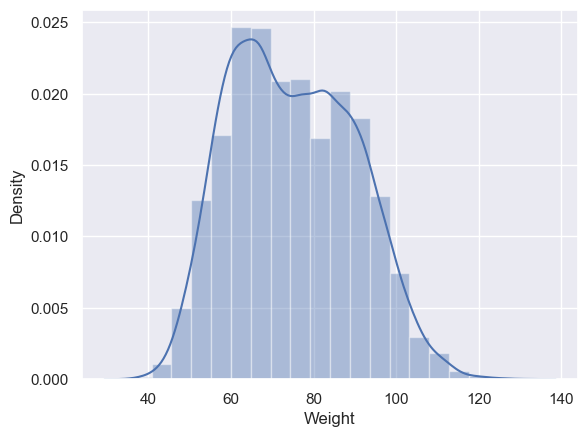

In [121]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'], kde=True, bins=20)
plt.show()

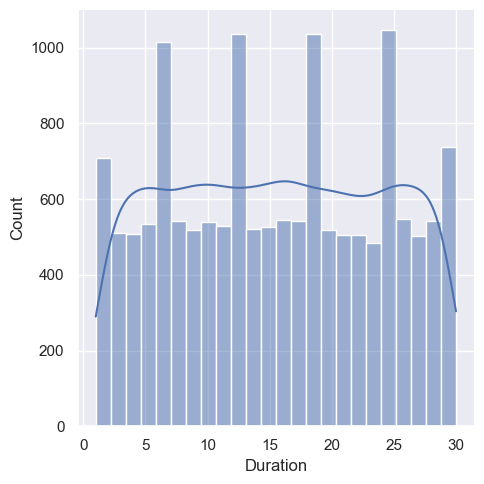

In [131]:
sns.displot(calories_data['Duration'], kde=True)
plt.show()

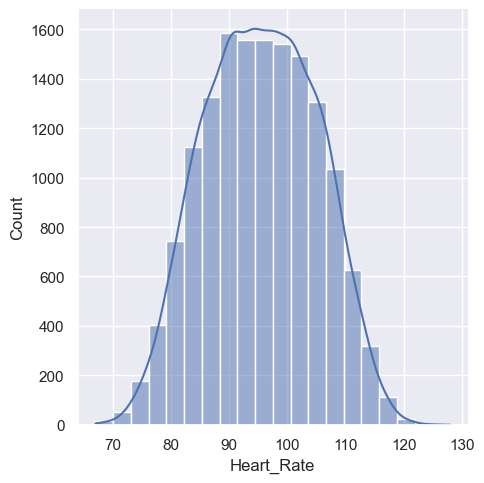

In [132]:
sns.displot(calories_data['Heart_Rate'], kde=True,bins=20)
plt.show()

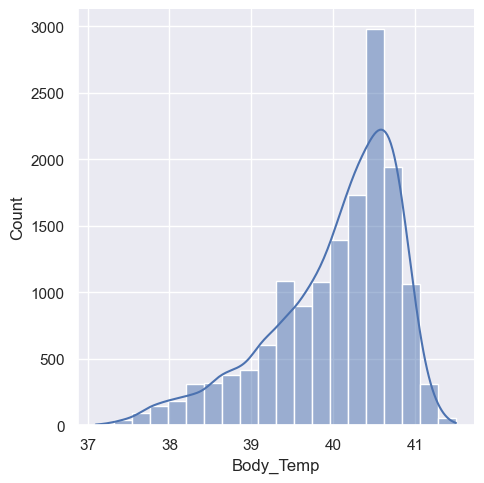

In [133]:
sns.displot(calories_data['Body_Temp'], kde=True,bins=20)
plt.show()

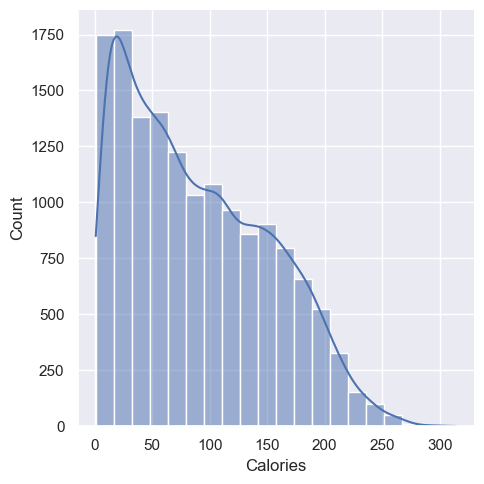

In [122]:
# finding the distribution of "Calories" column
sns.displot(calories_data['Calories'], kde=True, bins=20)
plt.show()

# Plotting Boxplots

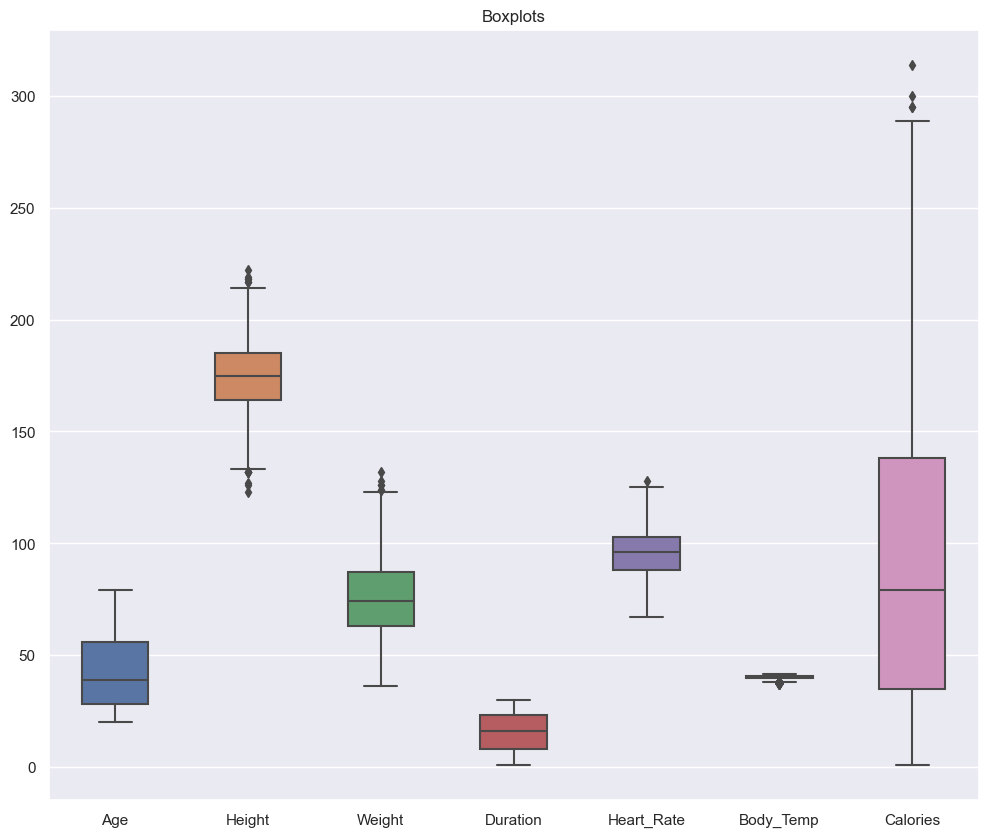

In [134]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.boxplot(data=calories_data, width=0.5)
plt.title("Boxplots")
plt.show()

In [135]:
def percent_outliers(calories_data):
    percent_outliers = pd.DataFrame()
    first_col = True
    for col in calories_data.columns:
        if np.issubdtype(calories_data[col].dtype, np.number) and not calories_data[col].isnull().all():
            q1, q3 = np.percentile(calories_data[col], [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            num_outliers = len(calories_data[(calories_data[col] < lower_bound) | (calories_data[col] > upper_bound)])
            percent_outliers[col] = [100 * num_outliers / len(calories_data)]
            first_col = False
        elif not first_col:
            percent_outliers[col] = [0]
        else:
            first_col = False
    return percent_outliers


print(percent_outliers(calories_data))

   Age    Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0  0.0  0.093333    0.04       0.0    0.006667       2.46  0.026667


# Correlation Matrix 

In [137]:
calories_data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [140]:
# Convert the 'Gender' column to numeric values
calories_data.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)

In [142]:
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


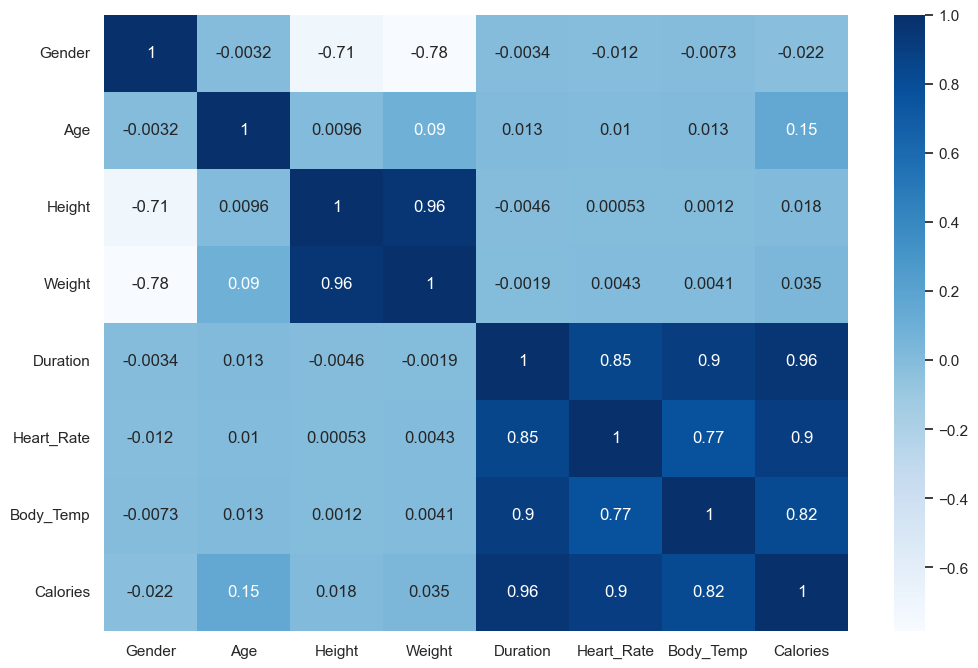

In [141]:
plt.figure(figsize=(12, 8))
corr = calories_data.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

# Separating features and Target

In [148]:
X = calories_data.drop(columns=['Calories'], axis=1)
y = calories_data['Calories']

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [151]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# Model Training

In [152]:
# loading the model
model = XGBRegressor()

In [153]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Evaluation

### Prediction on Test Data

In [154]:
test_data_prediction = model.predict(X_test)

In [155]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


### Mean Absolute Error

In [156]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [157]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4807048829992613
